## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv("Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


## Data Exploration

In [4]:
df.shape

(2200, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [8]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

## Exploratory Data Analysis (EDA)

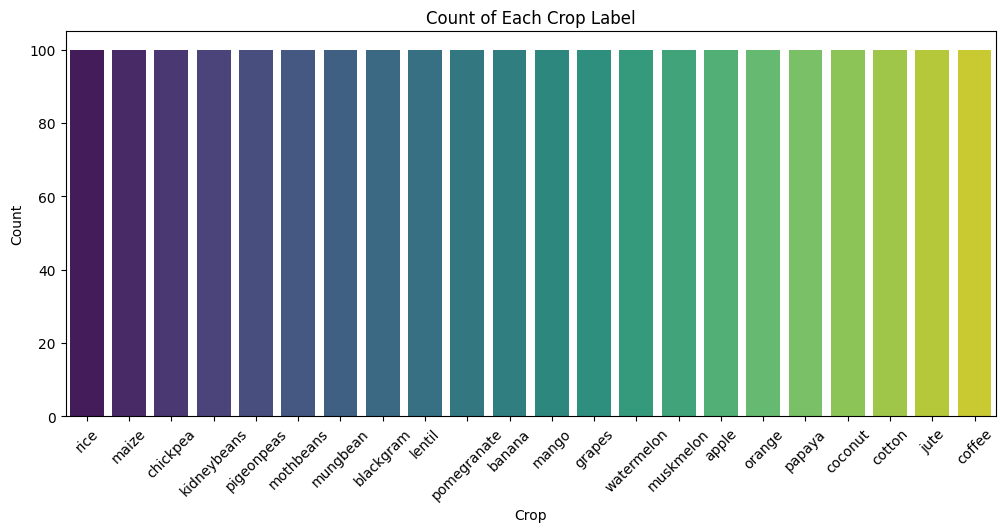

In [11]:
# bar graph to count labels of each crop
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='label', palette='viridis')
plt.title('Count of Each Crop Label')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

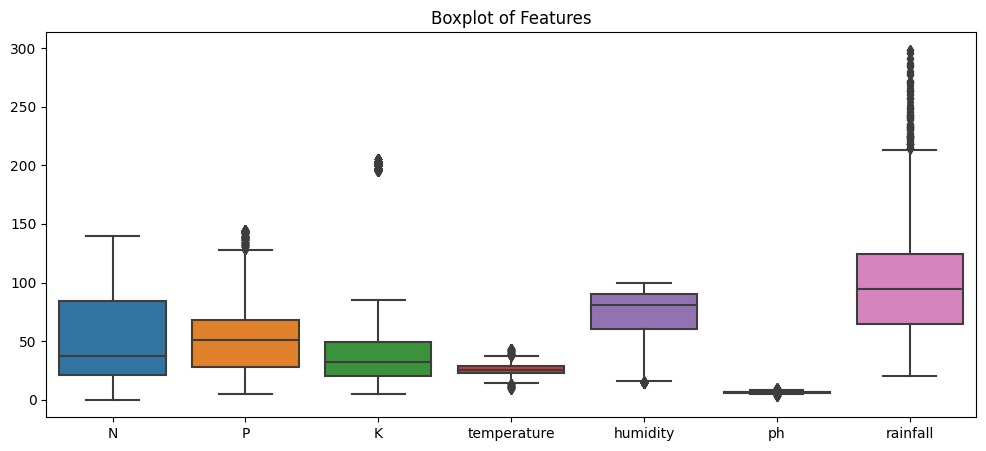

In [12]:
# Boxplot to observe distribution and potential outliers in the features
plt.figure(figsize=(12, 5))

sns.boxplot(data=df.drop(columns=['label']))
plt.title('Boxplot of Features')
plt.show()

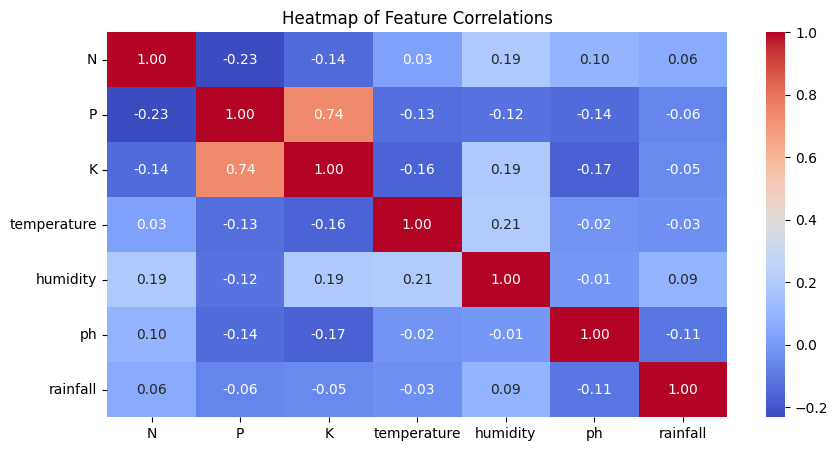

In [13]:
# Heatmap to analyze correlation between features
plt.figure(figsize=(10, 5))
correlation_matrix = df.drop(columns=['label']).corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Feature Correlations')
plt.show()

## Data Preprocessing

In [14]:
#Converting columns containing objects into numeric data type
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [15]:
df['label'].value_counts()

label
20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: count, dtype: int64

## Splitting into Training & Testing Sets

In [16]:
#Separating the features and the target variable
X=df.drop(columns=['label'],axis=1)
y=df['label']

In [17]:
#breaking the dataset into 80% training data and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [18]:
#scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Machine Learning Algorithms

In [19]:
# Defining the the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Evaluating model performances
for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"Performance of {name} - Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1 Score: {f1:.3f}")

Performance of Logistic Regression - Accuracy: 0.964, Precision: 0.964, Recall: 0.964, F1 Score: 0.964
Performance of Support Vector Machine - Accuracy: 0.968, Precision: 0.972, Recall: 0.968, F1 Score: 0.968
Performance of K-Nearest Neighbors - Accuracy: 0.957, Precision: 0.963, Recall: 0.957, F1 Score: 0.957
Performance of Naive Bayes - Accuracy: 0.995, Precision: 0.996, Recall: 0.995, F1 Score: 0.995
Performance of Decision Tree - Accuracy: 0.986, Precision: 0.987, Recall: 0.986, F1 Score: 0.986
Performance of Random Forest - Accuracy: 0.993, Precision: 0.994, Recall: 0.993, F1 Score: 0.993


## Selected Model Performance

In [20]:
#Selected model: Naive Bayes with accuracy of 99.5%
nb= GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

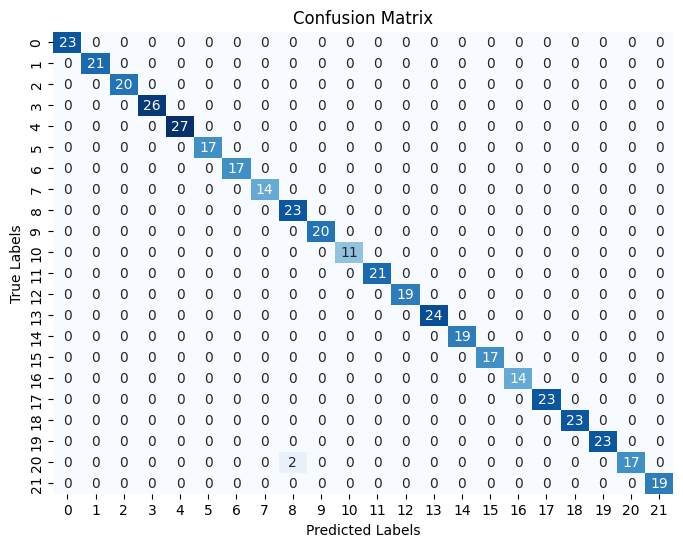

In [21]:
#Confusion Matrix
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Saving the Model

In [22]:
import pickle
pickle.dump(nb,open('Crop_Recommendation.pkl','wb'))

In [23]:
model=pickle.load(open('Crop_Recommendation.pkl','rb'))

## Making Predictions

In [24]:
model.predict(scaler.transform(np.array([74,35,40,26.491096,80.158363,6.980401,242.864034]).reshape(1,-1)))

C:\Users\BRATAJIT DAS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([20])

In [25]:
model.predict(scaler.fit_transform(np.array([104,18,30,23.603016,60.396475,6.779833,140.937041]).reshape(1,-1)))

array([8])